In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

In [440]:
df = pd.read_csv("loan_old.csv")

In [441]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Income                 0
Coapplicant_Income     0
Loan_Tenor            15
Credit_History        50
Property_Area          0
Max_Loan_Amount       25
Loan_Status            0
dtype: int64


In [442]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(categorical_cols)
print(numerical_cols)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Income', 'Coapplicant_Income', 'Loan_Tenor', 'Credit_History',
       'Max_Loan_Amount'],
      dtype='object')


In [443]:
print(df[numerical_cols].describe())

             Income  Coapplicant_Income  Loan_Tenor  Credit_History  \
count    614.000000          614.000000  599.000000      564.000000   
mean    5403.459283         1621.245798  137.689482        0.842199   
std     6109.041673         2926.248369   23.366294        0.364878   
min      150.000000            0.000000   12.000000        0.000000   
25%     2877.500000            0.000000  144.000000        1.000000   
50%     3812.500000         1188.500000  144.000000        1.000000   
75%     5795.000000         2297.250000  144.000000        1.000000   
max    81000.000000        41667.000000  192.000000        1.000000   

       Max_Loan_Amount  
count       589.000000  
mean        230.499474  
std         161.976967  
min          12.830000  
25%         123.990000  
50%         190.370000  
75%         276.500000  
max         990.490000  


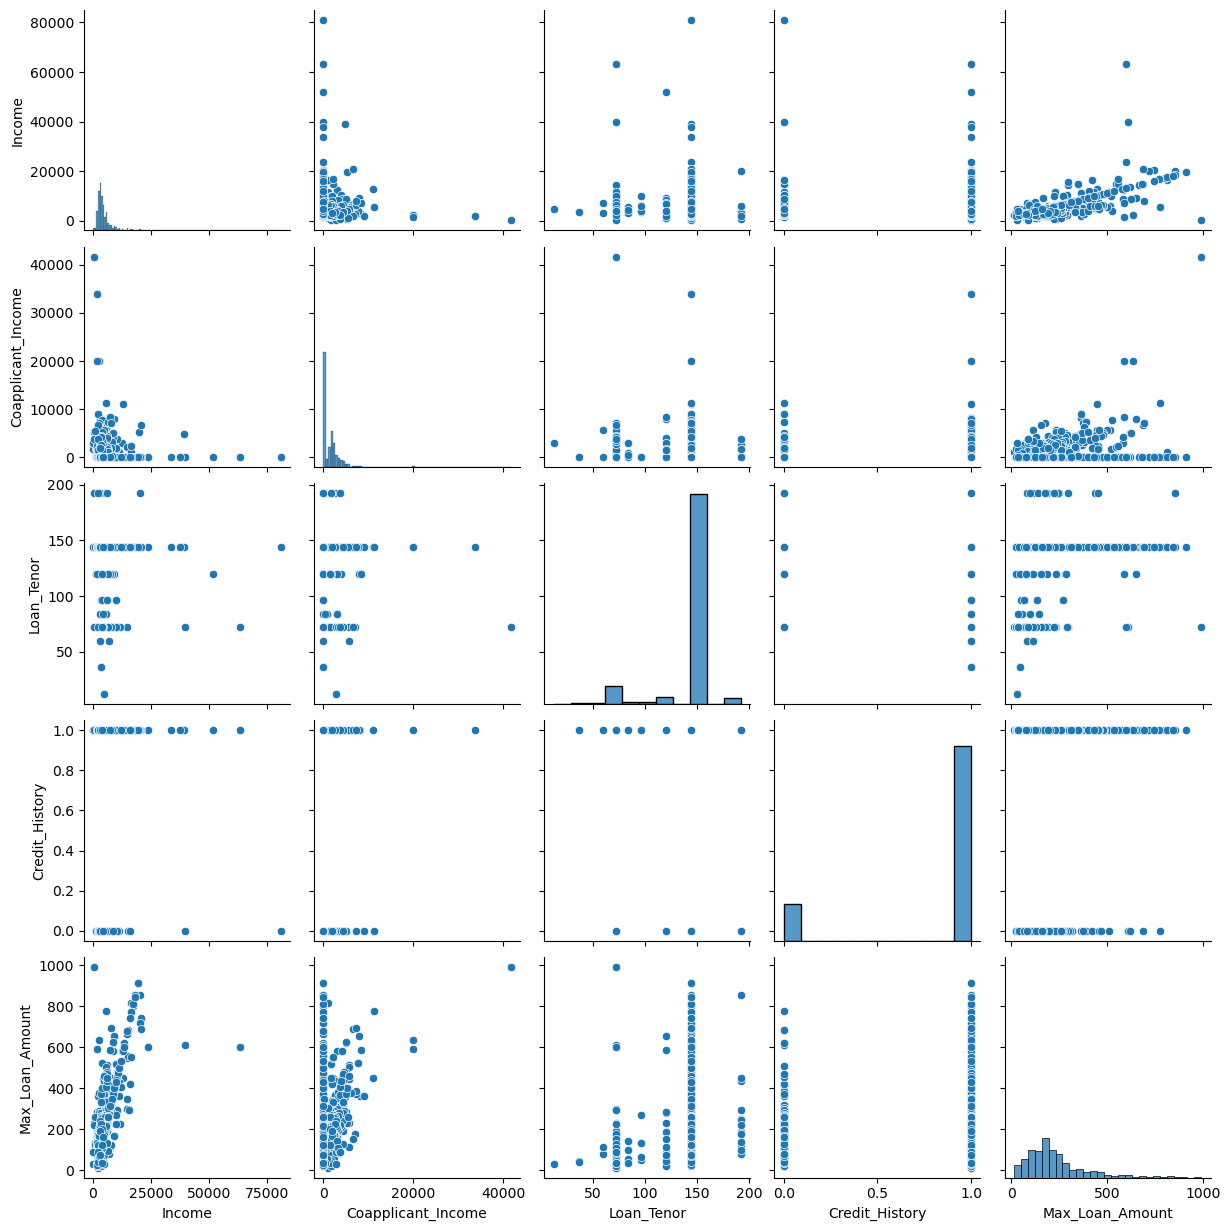

In [444]:
sns.pairplot(df[numerical_cols])
plt.show()

In [445]:
df_clean = df.dropna()

In [446]:
print(df_clean.isnull().sum())

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Income                0
Coapplicant_Income    0
Loan_Tenor            0
Credit_History        0
Property_Area         0
Max_Loan_Amount       0
Loan_Status           0
dtype: int64


In [447]:
print("Original rows:", len(df))

Original rows: 614


In [448]:
print("Rows after removing missing values:", len(df_clean))

Rows after removing missing values: 513


In [449]:
 targets = ['Max_Loan_Amount' , 'Loan_Status']
X = df_clean.drop(targets , axis = 1)
y_status = df_clean['Loan_Status']
y_amount = df_clean['Max_Loan_Amount']
print(X.shape)
print(y_status.shape)
print(y_amount.shape)

(513, 10)
(513,)
(513,)


In [450]:
X_train , X_test , y_status_train , y_status_test = train_test_split(
    X , y_status , test_size = 0.2 , random_state = 42 )

_, _, y_amount_train, y_amount_test = train_test_split(
    X, y_amount, test_size=0.2, random_state=42
)



In [451]:
print(y_status_test)

366    N
595    Y
527    Y
184    Y
598    Y
      ..
476    Y
204    Y
330    Y
605    N
609    Y
Name: Loan_Status, Length: 103, dtype: object


In [452]:
columns_to_drop = ['Loan_ID']
X_train = X_train.drop(columns_to_drop , axis = 1)
X_test  = X_test.drop(columns_to_drop , axis = 1)
categorical_inputs = X_train.select_dtypes(include = ['object']).columns
print(categorical_inputs)
encoder = OneHotEncoder(drop = 'first' , sparse_output = False)

X_train_encoded = encoder.fit_transform(X_train[categorical_inputs])
X_test_encoded  = encoder.transform(X_test[categorical_inputs])

X_train_encoded = pd.DataFrame(
    X_train_encoded,
    columns = encoder.get_feature_names_out(categorical_inputs),
    index=X_train.index
)
X_test_encoded = pd.DataFrame(
    X_test_encoded,
    columns = encoder.get_feature_names_out(categorical_inputs),
    index=X_test.index
)

print(X_train_encoded)


Index(['Gender', 'Married', 'Dependents', 'Education', 'Property_Area'], dtype='object')
     Gender_Male  Married_Yes  Dependents_1  Dependents_2  Dependents_3+  \
385          1.0          0.0           1.0           0.0            0.0   
396          0.0          0.0           0.0           0.0            0.0   
210          0.0          0.0           0.0           0.0            0.0   
327          1.0          1.0           0.0           0.0            0.0   
590          1.0          1.0           0.0           0.0            0.0   
..           ...          ...           ...           ...            ...   
132          1.0          0.0           0.0           0.0            0.0   
325          1.0          1.0           1.0           0.0            0.0   
417          1.0          1.0           0.0           1.0            0.0   
523          1.0          1.0           0.0           1.0            0.0   
124          1.0          1.0           0.0           0.0            0.0   

In [453]:
le = LabelEncoder()

y_status_train_encoded = le.fit_transform(y_status_train)
y_status_test_encoded = le.transform(y_status_test)


In [454]:
print(y_status_test)

366    N
595    Y
527    Y
184    Y
598    Y
      ..
476    Y
204    Y
330    Y
605    N
609    Y
Name: Loan_Status, Length: 103, dtype: object


In [455]:
X_train_final = pd.concat([X_train.drop(categorical_inputs , axis = 1) , X_train_encoded] , axis = 1)
X_test_final  = pd.concat([X_test.drop(categorical_inputs , axis = 1) , X_test_encoded] , axis = 1)
print(X_train_final)
print(X_test_final)


     Income  Coapplicant_Income  Loan_Tenor  Credit_History  Gender_Male  \
385    3667                 0.0        72.0             1.0          1.0   
396    3180                 0.0       144.0             0.0          0.0   
210   10000                 0.0       144.0             1.0          0.0   
327    5818              2160.0       144.0             1.0          1.0   
590    3000              3416.0        72.0             1.0          1.0   
..      ...                 ...         ...             ...          ...   
132    2718                 0.0       144.0             1.0          1.0   
325    8666              4983.0       144.0             0.0          1.0   
417    1600             20000.0       144.0             1.0          1.0   
523    7948              7166.0       144.0             1.0          1.0   
124    4300              2014.0       144.0             1.0          1.0   

     Married_Yes  Dependents_1  Dependents_2  Dependents_3+  \
385          0.0        

In [456]:
print(X_train_final.shape)
print(X_train_final.columns)
print(X_test_final.shape)
print(X_test_final.columns)

(410, 12)
Index(['Income', 'Coapplicant_Income', 'Loan_Tenor', 'Credit_History',
       'Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Not Graduate', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')
(103, 12)
Index(['Income', 'Coapplicant_Income', 'Loan_Tenor', 'Credit_History',
       'Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Not Graduate', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')


In [457]:
numerical_features = X_train.select_dtypes(include = ['int64' , 'float64']).columns
print(numerical_features)

Index(['Income', 'Coapplicant_Income', 'Loan_Tenor', 'Credit_History'], dtype='object')


In [458]:
scaler = StandardScaler()


In [459]:
X_train_final[numerical_features] = scaler.fit_transform(X_train_final[numerical_features])
X_test_final[numerical_features] = scaler.transform(X_test_final[numerical_features])

In [460]:
print(X_train_final)

       Income  Coapplicant_Income  Loan_Tenor  Credit_History  Gender_Male  \
385 -0.349197           -0.696659   -3.062286        0.422091          1.0   
396 -0.476565           -0.696659    0.270999       -2.369157          0.0   
210  1.307112           -0.696659    0.270999        0.422091          0.0   
327  0.213368            0.325875    0.270999        0.422091          1.0   
590 -0.523641            0.920460   -3.062286        0.422091          1.0   
..        ...                 ...         ...             ...          ...   
132 -0.597394           -0.696659    0.270999        0.422091          1.0   
325  0.958223            1.662270    0.270999       -2.369157          1.0   
417 -0.889792            8.771249    0.270999        0.422091          1.0   
523  0.770440            2.695692    0.270999        0.422091          1.0   
124 -0.183644            0.256759    0.270999        0.422091          1.0   

     Married_Yes  Dependents_1  Dependents_2  Dependents_3+  \


In [461]:
lr = LinearRegression()

In [462]:
lr.fit(X_train_final , y_amount_train)

LinearRegression()

In [463]:
y_amount_prediction = lr.predict(X_test_final)

In [464]:
r2 = r2_score(y_amount_test , y_amount_prediction)
print(f"R² Score: {r2:.4f}")

R² Score: -0.2886


In [465]:
def sigmoid(z) :
    return 1/ (1 + np.exp(-z))

In [466]:
def initialize_parameters(n):
    w = np.zeros((n , 1))
    b = 0
    return w , b

In [467]:
def propagate(w , b , X , y):
    m = X.shape[0]
    z = np.dot(X , w) + b
    A = sigmoid(z)
    cost =  (-1/m) * np.sum(y * np.log(A + 1e-15) + (1 - y) * np.log(1 - A + 1e-15))
    dw = (1 / m) * np.dot(X.T , (A - y))
    db = (1 / m) * np.sum(A - y)

    grads = {
        "dw" : dw,
        "db" : db
    }
    return grads , cost

In [468]:
def optimize(w , b , X , y , iterations , learning_rate = 0.01):
    costs = []
    for i in range(iterations):
        grads , cost = propagate(w , b , X , y)
        dw = grads["dw"]
        db = grads["db"]
        w -= learning_rate * dw
        b -= learning_rate * db
        if(i % 100):
            costs.append(cost)
            print(f"Iteration {i}, Cost: {cost}")
        return w  , b , costs

In [469]:
def predict(w , b , X):
    z = np.dot(X , w) + b
    A = sigmoid(z)
    return (A > 0.5).astype(int)

In [470]:
print(y_status_train.shape)
print(y_status_test.shape)
print(y_status_train[:5])
print(y_status_test[:5])


(410,)
(103,)
385    Y
396    N
210    N
327    Y
590    Y
Name: Loan_Status, dtype: object
366    N
595    Y
527    Y
184    Y
598    Y
Name: Loan_Status, dtype: object


In [471]:
y_status_train = np.where(y_status_train == 'Y', 1, 0)
y_status_test = np.where(y_status_test == 'Y', 1, 0)

In [472]:
print(y_status_train.shape)
print(y_status_test.shape)
print(y_status_train)
print(y_status_test)


(410,)
(103,)
[1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1
 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1
 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0
 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1
 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1
 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 1]
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0
 0 

In [473]:
n_features = X_train_final.shape[1]
w , b = initialize_parameters(n_features)

In [474]:
print("X shape:", X_train_final.shape)      # (m, n)
print("y shape:", y_status_train.shape)     # (m, 1)
print(y_status_test.shape)
print(y_status_test)

X shape: (410, 12)
y shape: (410,)
(103,)
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0
 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1]


In [475]:
y_status_train = y_status_train.reshape(-1, 1).astype(float)
print("y shape:", y_status_train.shape)
X_train_final = np.array(X_train_final)
y_status_train = np.array(y_status_train)
w , b , costs = optimize(w , b , X_train_final , y_status_train , iterations = 1000 , learning_rate = 0.01)

y shape: (410, 1)


In [476]:
def accuracy(y_true , y_pred):
    return np.mean(y_true == y_pred)

In [477]:
y_status_pred = predict(w , b , X_test_final)

In [478]:
acc = accuracy(y_status_test , y_status_pred)

In [479]:
print("Accuracy (Logistic Regression):", acc)

Accuracy (Logistic Regression): 0.6838533320765388


In [480]:
df_new = pd.read_csv("loan_new.csv")

In [481]:
print("Missing values before preprocessing: ", df_new.isnull().sum())

Missing values before preprocessing:  Loan_ID                0
Gender                11
Married                0
Dependents            10
Education              0
Income                 0
Coapplicant_Income     0
Loan_Tenor             7
Credit_History        29
Property_Area          0
dtype: int64


In [482]:
df_new_clean = df_new.dropna()

In [483]:
print("Missing values after preprocessing: ", df_new_clean.isnull().sum())

Missing values after preprocessing:  Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Income                0
Coapplicant_Income    0
Loan_Tenor            0
Credit_History        0
Property_Area         0
dtype: int64


In [484]:
columns_to_drop = ['Loan_ID']
X_new = df_new_clean.drop(columns_to_drop, axis = 1)

In [485]:
print("X_new cols:" , X_new.columns)

X_new cols: Index(['Gender', 'Married', 'Dependents', 'Education', 'Income',
       'Coapplicant_Income', 'Loan_Tenor', 'Credit_History', 'Property_Area'],
      dtype='object')


In [486]:
categorical_cols = X_new.select_dtypes(include = ['object']).columns
X_new_cat_encoded = encoder.transform(X_new[categorical_cols])

In [487]:
X_new_cat_encoded = pd.DataFrame(
    X_new_cat_encoded,
    columns = encoder.get_feature_names_out(categorical_cols),
    index = X_new.index
)

In [489]:
print(X_new.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Income',
       'Coapplicant_Income', 'Loan_Tenor', 'Credit_History', 'Property_Area'],
      dtype='object')


In [490]:
X_new_final = pd.concat([X_new.drop(categorical_cols , axis = 1), X_new_cat_encoded] , axis = 1)

In [491]:
numerical_cols = X_new.select_dtypes(include = ['int64' , 'float64']).columns
print(numerical_cols)

Index(['Income', 'Coapplicant_Income', 'Loan_Tenor', 'Credit_History'], dtype='object')


In [493]:
X_new_final[numerical_cols] = scaler.transform(X_new_final[numerical_cols])

In [494]:
print(X_new_final.describe())

           Income  Coapplicant_Income  Loan_Tenor  Credit_History  \
count  314.000000          314.000000  314.000000      314.000000   
mean    -0.070658            0.028146    0.003251       -0.066822   
std      1.240797            1.106007    1.065880        1.062656   
min     -1.308250           -0.696659   -5.840023       -2.369157   
25%     -0.560126           -0.696659    0.270999        0.422091   
50%     -0.305520           -0.292616    0.270999        0.422091   
75%      0.032319            0.445526    0.270999        0.422091   
max     17.660706           10.664830    2.493188        0.422091   

       Gender_Male  Married_Yes  Dependents_1  Dependents_2  Dependents_3+  \
count   314.000000   314.000000    314.000000    314.000000     314.000000   
mean      0.802548     0.659236      0.162420      0.175159       0.105096   
std       0.398712     0.474723      0.369425      0.380710       0.307166   
min       0.000000     0.000000      0.000000      0.000000       

In [499]:
loan_amount_prediction_new = lr.predict(X_new_final)

In [500]:
loan_status_prediction_new = predict(w , b , X_new_final)

In [501]:
loan_status_labels = le.inverse_transform(loan_status_prediction_new)

D:\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [503]:
pd.DataFrame({
    'Loan_ID': df_new_clean['Loan_ID'],
    'Predicted_LoanAmount': loan_amount_prediction_new,
    'Predicted_LoanStatus': loan_status_labels
}).to_csv("predictions.csv", index=False)